# Stacked bar chart each row sums up to 100%

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('/Users/sevadaaghasyan/Downloads/weather-check.csv')

In [10]:
df = df.rename(columns = {'Do you typically check a daily weather report?':'Question 1',
                              'How do you typically check the weather?':'Question 2',
                              'A specific website or app (please provide the answer)':'Question 3',
                              'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?':'Question 4',
                              'Age':'Question 5',
                              'What is your gender?':'Question 6',
                              'How much total combined money did all members of your HOUSEHOLD earn last year?':'Question 7'})

In [11]:
df['US Region'] = df['US Region'].replace(['-'],'Prefer not to answer')
df['Question 4'] = df['Question 4'].replace(['-'],'Prefer not to answer')

In [12]:
data = df.groupby('US Region')[['Question 4']].value_counts(normalize=True).unstack().fillna(0) * 100

In [13]:
data

Question 4,Prefer not to answer,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
US Region,,,,,
East North Central,0.000000,26.950355,7.092199,44.680851,21.276596
East South Central,0.000000,26.829268,14.634146,39.024390,19.512195
Middle Atlantic,0.000000,22.115385,7.692308,43.269231,26.923077
Mountain,0.000000,26.388889,9.722222,38.888889,25.000000
New England,0.000000,30.769231,7.692308,42.307692,19.230769
Pacific,0.000000,36.216216,9.729730,29.729730,24.324324
Prefer not to answer,35.483871,22.580645,6.451613,12.903226,22.580645
South Atlantic,0.000000,30.519481,5.194805,48.051948,16.233766
West North Central,0.000000,38.888889,5.555556,33.333333,22.222222


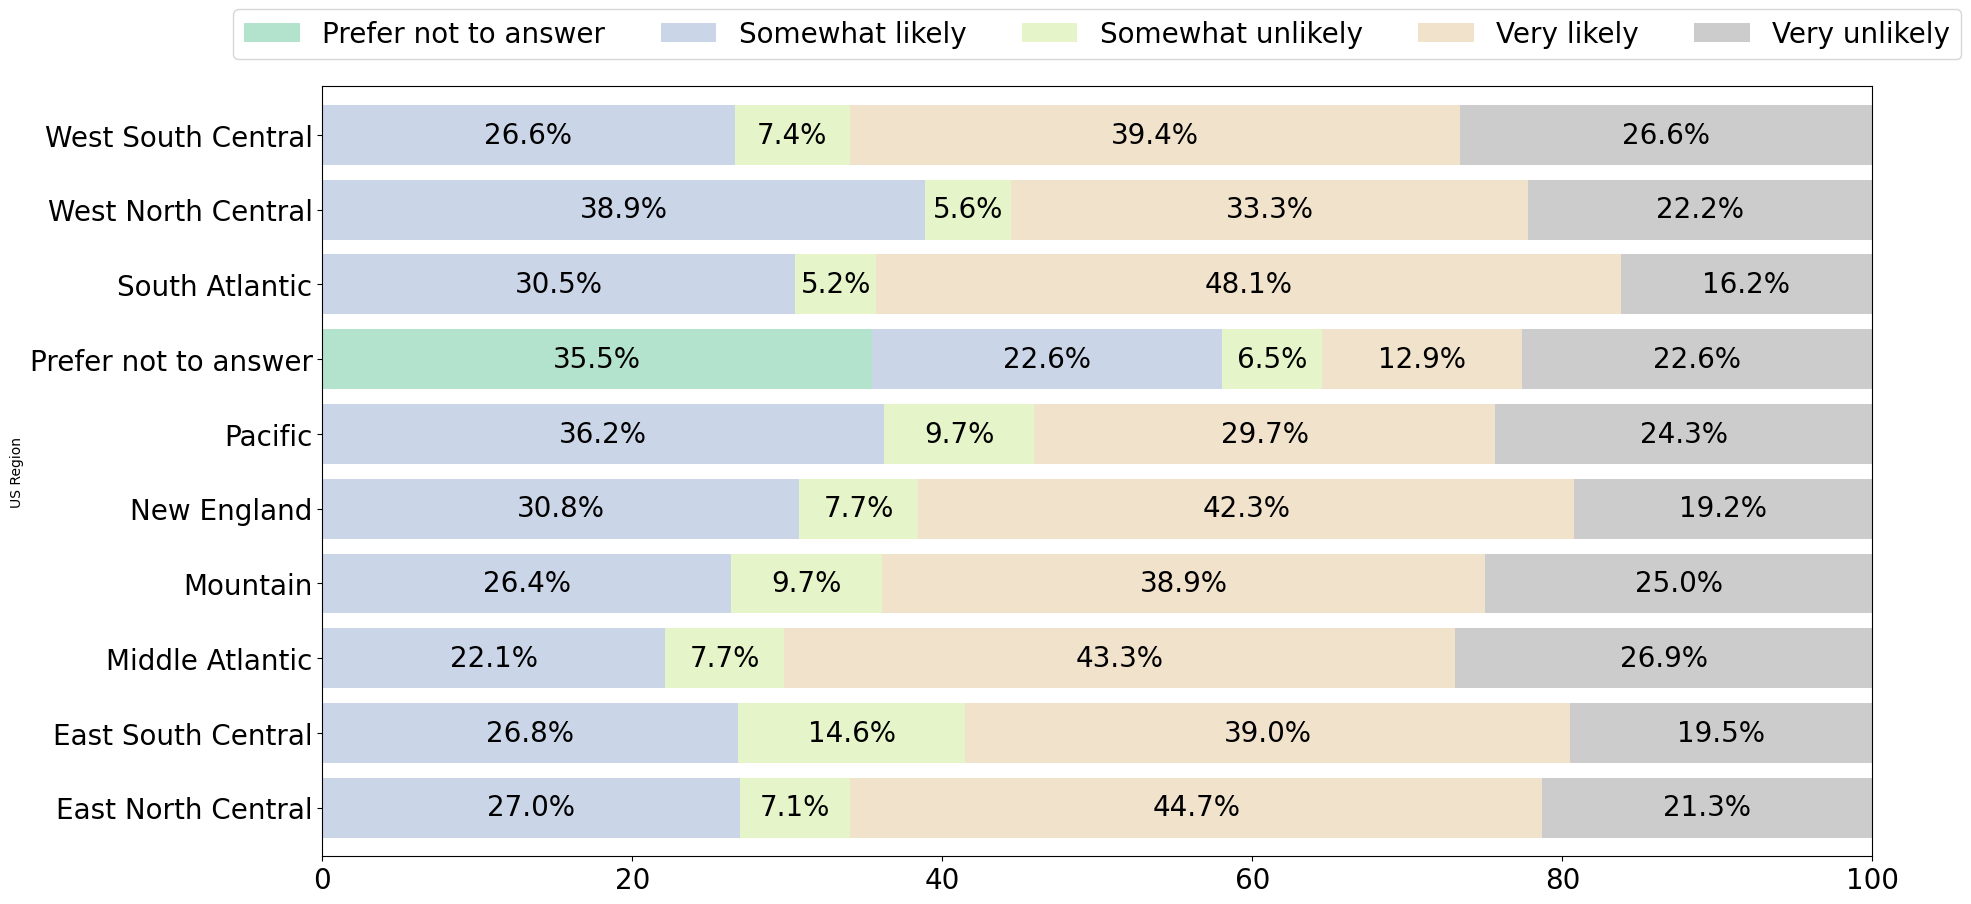

In [14]:
## Data Indexes 
DataIndexes = data.index

## Name of each column (for the legend)
dff = pd.DataFrame(data=data)

dff.index = DataIndexes


# define plot type and layout
ax = dff.plot(stacked=True, kind='barh', figsize=(20, 10), colormap="Pastel2", width=0.8, fontsize=20, xlim=[0,100])

# Add labels to the bars 
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and can be used as the label
    label_text = ""
    if width > 4:
      label_text = f'{width:.1f}' + "%"  ##### use {width:.2f} or {width:.3f} to increase precision  ####
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=20)

# Set legend position and style
plt.legend(bbox_to_anchor=(0.5, 1.1), loc="upper center", borderaxespad=0., fontsize=20, ncol = len(data))    
# Set Background Color
ax.set_facecolor("white")

# Stacked bar chart with absolute values

In [15]:
data_1 = df.groupby('US Region')[['Question 4']].value_counts().unstack().fillna(0)

In [16]:
data_1

Question 4,Prefer not to answer,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
US Region,,,,,
East North Central,0.0,38.0,10.0,63.0,30.0
East South Central,0.0,11.0,6.0,16.0,8.0
Middle Atlantic,0.0,23.0,8.0,45.0,28.0
Mountain,0.0,19.0,7.0,28.0,18.0
New England,0.0,16.0,4.0,22.0,10.0
Pacific,0.0,67.0,18.0,55.0,45.0
Prefer not to answer,11.0,7.0,2.0,4.0,7.0
South Atlantic,0.0,47.0,8.0,74.0,25.0
West North Central,0.0,21.0,3.0,18.0,12.0


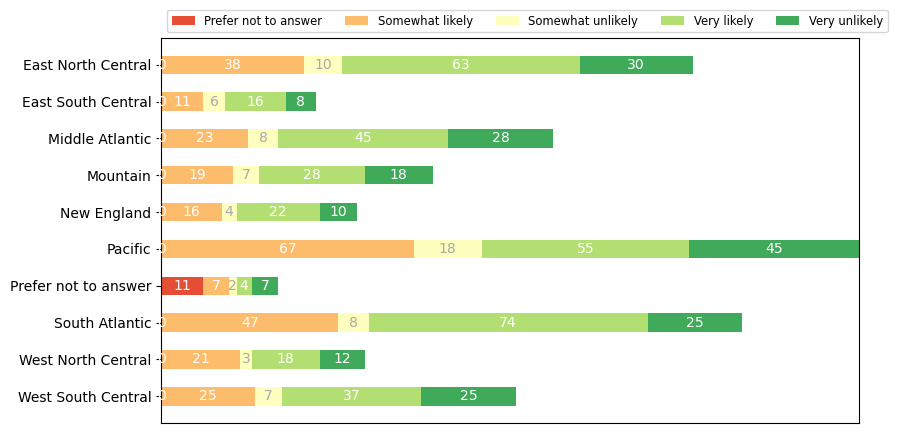

In [17]:
category_names = ['Prefer not to answer','Somewhat likely','Somewhat unlikely',
                 'Very likely','Very unlikely']
results = {
    data_1.index[0]: data_1.values[0].round(),
    data_1.index[1]: data_1.values[1].round(),
    data_1.index[2]: data_1.values[2].round(),
    data_1.index[3]: data_1.values[3].round(),
    data_1.index[4]: data_1.values[4].round(),
    data_1.index[5]: data_1.values[5].round(),
    data_1.index[6]: data_1.values[6].round(),
    data_1.index[7]: data_1.values[7].round(),
    data_1.index[8]: data_1.values[8].round(),
    data_1.index[9]: data_1.values[9].round()
}
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    return fig, ax
survey(results, category_names)
plt.show()